# 1. Définition du Problème et Objectifs

## Contexte et Pertinence 

Dans un contexte mondial où la gestion efficace de l'énergie est devenue une priorité cruciale, notre projet vise à analyser la consommation d'énergie par département dans différents secteurs en France. L'objectif est de fournir une compréhension approfondie des modèles de consommation énergétique, qui est essentielle pour orienter les politiques énergétiques, promouvoir la durabilité et optimiser les ressources. Ce projet est particulièrement pertinent étant donné les défis actuels liés au changement climatique et à la transition énergétique. En examinant les données de consommation énergétique à l'échelle des communes, nous pouvons identifier des tendances spécifiques, des anomalies et des opportunités d'amélioration. Cela permettra aux décideurs, aux entreprises et aux consommateurs de prendre des mesures éclairées pour réduire la consommation d'énergie, améliorer l'efficacité énergétique et favoriser l'adoption d'énergies renouvelables. En outre, ce projet contribue à une meilleure compréhension des disparités régionales en matière de consommation d'énergie, offrant ainsi une perspective précieuse pour des interventions ciblées et personnalisées.  

## Objectifs du Projet

Notre projet, au cœur de l'intersection entre technologie, environnement et société, se fixe des objectifs ambitieux et significatifs :

**Cartographie de la Consommation Énergétique :** Notre premier objectif est de dresser une carte précise de la consommation d'énergie dans les différents départements français. En mettant en lumière ces données, nous souhaitons offrir une vision claire et détaillée de la répartition énergétique sur le territoire.

**Identification des Tendances et Anomalies :** Nous visons à décrypter les tendances sous-jacentes et à détecter d'éventuelles anomalies dans les habitudes de consommation énergétique. Cela permettra de comprendre les pratiques énergétiques actuelles et d'identifier les zones à haut potentiel d'amélioration.

**Analyse Comparative par Secteur :** Un autre objectif crucial est de comparer la consommation énergétique entre différents secteurs (résidentiel, industriel, commercial, etc.). Cela aidera à cerner les secteurs les plus énergivores et à envisager des stratégies d'optimisation.

**Prédiction des Tendances Futures :** Nous ambitionnons de développer des modèles prédictifs pour anticiper les évolutions futures de la consommation d'énergie. Ces prévisions seront essentielles pour planifier des stratégies énergétiques à long terme.

**Contribution à la Durabilité :** En offrant une compréhension approfondie de la consommation d'énergie, le projet aspire à contribuer activement à des initiatives de développement durable. Les insights générés pourraient inspirer des actions concrètes pour réduire l'empreinte énergétique.

**Support aux Décisions Politiques et Commerciales :** Fournir des données et des analyses fiables pour éclairer les décisions politiques et commerciales en matière de gestion de l'énergie. Cela inclut la recommandation de politiques efficaces et la sensibilisation aux meilleures pratiques en matière de consommation énergétique.

**Sensibilisation et Éducation :** Enfin, nous souhaitons utiliser nos résultats pour sensibiliser le public et les décideurs aux enjeux de la consommation d'énergie. L'objectif est de promouvoir une culture de consommation énergétique responsable et informée.

## Aspects techniques

### Packages

In [48]:
# Installation des packages

!pip install -q lxml
!pip install webdriver-manager
!pip install BeautifulSoup4
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install pygeos
!pip install topojson
!pip install seaborn
!pip install statsmodels
!pip install scikit-learn

import statsmodels.api as sm
import requests
import re
import bs4
import lxml
import pandas as pd
import urllib
import seaborn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from urllib import request

### URL

In [2]:
url_1 = "https://odre.opendatasoft.com/explore/embed/dataset/conso-departement-annuelle/table/?disjunctive.libelle_departement&disjunctive.libelle_region&disjunctive.e_operateurs&disjunctive.g_operateurs&refine.annee=2021&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJjb25zb3RvdGFsZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiM2NmMyYTUifV0sInhBeGlzIjoibGliZWxsZV9kZXBhcnRlbWVudCIsIm1heHBvaW50cyI6NTAsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6ImNvbnNvLWRlcGFydGVtZW50LWFubnVlbGxlIiwib3B0aW9ucyI6eyJkaXNqdW5jdGl2ZS5saWJlbGxlX2RlcGFydGVtZW50Ijp0cnVlLCJkaXNqdW5jdGl2ZS5saWJlbGxlX3JlZ2lvbiI6dHJ1ZSwiZGlzanVuY3RpdmUuZV9vcGVyYXRldXJzIjp0cnVlLCJkaXNqdW5jdGl2ZS5nX29wZXJhdGV1cnMiOnRydWUsInJlZmluZS5hbm5lZSI6IjIwMjEifX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=3,17.56025,53.4375&basemap=jawg.light"
url_2 = "https://www.insee.fr/fr/statistiques/6436484?sommaire=6036904#tableau-figure1_radio1"
url_3 = "https://odre.opendatasoft.com/explore/dataset/temperature-quotidienne-departementale/information/?disjunctive.departement"
url_4 = "https://www.insee.fr/fr/statistiques/6436484?sommaire=6036904#tableau-figure1_radio1"
url_5 = "https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#bbox=-1052198,6661338,2597056,1619174&c=indicator&i=insee_rp_hist_1968.part_logt_vacant&s=2020&view=map9"
url_6 = "https://ufe-electricite.fr/watt-the-carte/deploiement-bornes-de-recharge-en-france/dans-les-territoires/"
url_7 = "https://www.carburants.org/borne-electrique/departements/"
url_8 : "https://www.observatoire-des-territoires.gouv.fr/nombre-dentreprises-par-secteurs-dactivite"

# 2. Collecte et Exploration des Données (Communes)

## Sources de Données

### Bases de données pre-existantes

##### Consommation totale d'énergie par commune

In [2]:
# url = https://www.data.gouv.fr/fr/datasets/consommation-annuelle-delectricite-et-gaz-par-commune-et-par-secteur-dactivite/
table_conso_com = pd.read_csv('conso_energie.csv',sep=';')
table_conso_com.head()

/tmp/ipykernel_286/2038213860.py:2: DtypeWarning: Columns (6,14,24,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  table_conso_com = pd.read_csv('conso_energie.csv',sep=';')


,operateur,annee,filiere,consoa,pdla,nombre_maille_secretisees_a,indquala,consoi,pdli,nombre_maille_secretisees_i,...,libelle_commune,code_epci,libelle_epci,code_departement,libelle_departement,code_region,libelle_region,id_filiere,consototale,code_postal
0,GRDF,2021,Gaz,0.0,0,0,0.0,0.00000,0,1,...,Armeau,248900334,CA du Grand Sénonais,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,2317.51553,89500
1,GRDF,2021,Gaz,0.0,0,0,0.0,0.00000,0,1,...,Branches,200067114,CA de l'Auxerrois,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,1905.29787,89113
2,GRDF,2021,Gaz,0.0,0,0,0.0,1895.35634,9,0,...,Brienon-sur-Armançon,200067304,CC Serein et Armance,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,16756.07274,89210/89210
3,GRDF,2021,Gaz,0.0,0,0,0.0,0.00000,0,0,...,Brion,248900938,CC du Jovinien,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,1696.15670,89400
4,GRDF,2021,Gaz,0.0,0,1,0.0,0.00000,0,0,...,La Celle-Saint-Cyr,248900938,CC du Jovinien,89,Yonne,27.0,Bourgogne-Franche-Comté,200.0,4395.90677,89116


##### Logements vacants par commune

In [3]:
# url = https://www.data.gouv.fr/fr/datasets/niveau-de-vie-des-francais-par-commune/
table_logements_vacants_com = pd.read_csv('logement_vacants_com.csv', sep=';', encoding='ISO-8859-1')
table_logements_vacants_com

/tmp/ipykernel_286/60800376.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  table_logements_vacants_com = pd.read_csv('logement_vacants_com.csv', sep=';', encoding='ISO-8859-1')


,codgeo,libgeo,an,part_logt_vacant
0,1001,L'Abergement-Clémenciat,1968,"15,5"
1,1001,L'Abergement-Clémenciat,1975,"12,6"
2,1001,L'Abergement-Clémenciat,1982,"9,1"
3,1001,L'Abergement-Clémenciat,1990,"4,6"
4,1001,L'Abergement-Clémenciat,1999,"3,1"
...,...,...,...,...
279555,97617,Tsingoni,1990,NaN
279556,97617,Tsingoni,1999,NaN
279557,97617,Tsingoni,2009,NaN
279558,97617,Tsingoni,2014,NaN


##### Nombre d'entreprises par commune

In [4]:
# url = https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#c=indicator&f=TOT&i=demo_ent_sect.ent_tot&s=2021&view=map59
table_nb_entr_com = pd.read_csv('table_nb_entr_com.csv',sep=';')
table_nb_entr_com.head()

,Code,Libellé,Nombre d'entreprises par secteurs d'activité 2021,Nombre d'entreprises par secteurs d'activité 2021.1
0,1001,L'Abergement-Clémenciat,41,2
1,1002,L'Abergement-de-Varey,18,3
2,1004,Ambérieu-en-Bugey,1097,54
3,1005,Ambérieux-en-Dombes,133,12
4,1006,Ambléon,7,0


##### Niveau de vie par commune

In [5]:
# url = https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#c=indicator&i=filosofi.med_disp&s=2020&view=map59
table_niveau_vie_com = pd.read_csv('niveau_vie_com.csv',sep=';')
table_niveau_vie_com.head()

,Code,Libellé,Médiane du revenu disponible par UC 2020
0,1001,L'Abergement-Clémenciat,24820
1,1002,L'Abergement-de-Varey,23220
2,1004,Ambérieu-en-Bugey,21070
3,1005,Ambérieux-en-Dombes,24380
4,1006,Ambléon,N/A - résultat non disponible


##### Taux de déplacement domicile-travail en transport en commun

In [6]:
# url = https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#bbox=-645836,6062176,1794690,1016154&c=indicator&i=insee_rp_hist_xxxx.part_domtrav_voit&s=2020&view=map59

table_dep_domtrav_tc = pd.read_csv('dep_domtrav_tc.csv', sep=';', encoding='ISO-8859-1')
table_dep_domtrav_tc

,codgeo,libgeo,an,part_domtrav_tc
0,1001,L'Abergement-Clémenciat,2009,"1,2"
1,1001,L'Abergement-Clémenciat,2014,"4,1"
2,1001,L'Abergement-Clémenciat,2020,"1,1"
3,1002,L'Abergement-de-Varey,2009,"7,7"
4,1002,L'Abergement-de-Varey,2014,"4,8"
...,...,...,...,...
104830,97616,Sada,2014,NaN
104831,97616,Sada,2020,NaN
104832,97617,Tsingoni,2009,NaN
104833,97617,Tsingoni,2014,NaN


### Bases de données webscrappées

##### Population par commune

In [7]:
import pandas as pd
from urllib import request
from bs4 import BeautifulSoup
import re  # Importer le module pour les expressions régulières

url_communes = "https://fr.wikipedia.org/wiki/Listes_des_communes_de_France"
text_communes = request.urlopen(url_communes).read().decode('utf-8')
page_communes = BeautifulSoup(text_communes, 'html.parser')
tableau_communes = page_communes.find('table', {'class': 'wikitable'})
tableau_communes = tableau_communes.find('tbody')
lignes_communes = tableau_communes.find_all('tr')
lignes_communes = lignes_communes[:-13]

# Liste pour stocker les contenus après "a href"
liste_url_communes = []

# Parcourir chaque ligne dans lignes_communes
for ligne in lignes_communes:
    # Trouver toutes les balises <td> dans la ligne
    td_tags = ligne.find_all('td')

    if len(td_tags) >= 3:
        if td_tags[-3].text.strip() != '75':
            derniere_td = td_tags[-1]
            a_tag = derniere_td.find('a')
            if a_tag:
                contenu_apres_href = a_tag.get('href')
                liste_url_communes.append(contenu_apres_href)

dico_communes = {}
liste_code_communes = []

for url in liste_url_communes:
    text = request.urlopen("https://fr.wikipedia.org" + url).read().decode('utf-8')
    page = BeautifulSoup(text, 'html.parser')  # Utilisez html.parser au lieu de lxml
    tableau = page.find('table', {'class': 'wikitable sortable titre-en-couleur'})
    tableau = tableau.find('tbody')
    lignes = tableau.find_all('tr')
    lignes.pop(0)
    lignes.pop(-1)

    for ligne in lignes:
        donnees = ligne.find_all('td')
        code_insee = donnees[1].text.strip()
        liste_code_communes.append(code_insee)
        pop_commune = donnees[-3].text.strip()
        dico_communes[code_insee] = pop_commune

# Créer le DataFrame à partir du dictionnaire
table_pop_com = pd.DataFrame.from_dict(dico_communes, orient='index').reset_index()
table_pop_com = table_pop_com.rename(columns={'index': 'Code commune'})
table_pop_com


,Code commune,0
0,01053,41 681 (2020)
1,01001,806 (2020)
2,01002,262 (2020)
3,01004,14 288 (2020)
4,01005,1 782 (2020)
...,...,...
34807,84147,3 295 (2020)
34808,84148,1 273 (2020)
34809,84149,1 727 (2020)
34810,84150,1 929 (2020)


### Récupération de données via API

##### Température par commune

In [8]:
# Dictionnaire pour stocker les moyennes de température par commune
#dico_temp_communes = {}

#root_api = "https://public.opendatasoft.com"

# Boucle sur chaque codegeo
#for codegeo in liste_code_communes:
    # Construire l'URL avec le codegeo actuel
    #url = f"{root_api}/api/explore/v2.1/catalog/datasets/donnees-synop-essentielles-omm/records?select=codegeo%2C%20tc%2C%20latitude%2C%20longitude&where=codegeo%3D%22{codegeo}%22&limit=99"

    # Récupérer les données depuis l'API
    #req = requests.get(url)
    #temp = req.json()
    #results = temp.get('results', [])
    
    # Créer un DataFrame avec les résultats
    #df = pd.DataFrame(results)
    
    # Vérifier si la colonne 'tc' existe dans le DataFrame
    #if 'tc' in df.columns:
        # Calculer la moyenne de la colonne 'tc'
        #moyenne = round(df['tc'].mean(), 2)
        
        # Ajouter la moyenne au dictionnaire avec le codegeo comme clé
        #dico_temp_communes[codegeo] = moyenne
    # else:
        # print(f"La colonne 'tc' est absente pour le codegeo {codegeo}")

# Afficher le dictionnaire final
# print(dico_temp_communes)

In [9]:
#import requests
#import pandas as pd
#from concurrent.futures import ThreadPoolExecutor

# Initialisation d'une session de requêtes
#session = requests.Session()

#def fetch_data(codegeo):
    #url = f"{root_api}/api/explore/v2.1/catalog/datasets/donnees-synop-essentielles-omm/records?select=codegeo%2C%20tc%2C%20latitude%2C%20longitude&where=codegeo%3D%22{codegeo}%22&limit=99"
    #try:
        #response = session.get(url)
        #response.raise_for_status()
        #data = response.json()
        #return data.get('results', [])
    #except requests.RequestException as e:
        #print(f"Erreur lors de la récupération des données pour {codegeo}: {e}")
        #return []

# Traitement des données en parallèle
#with ThreadPoolExecutor(max_workers=10) as executor:
    #results = executor.map(fetch_data, liste_code_communes)

# Traitement des résultats
#all_data = []
#for result in results:
    #all_data.extend(result)

# Création d'un DataFrame unique
#df = pd.DataFrame(all_data)

# Calcul des moyennes
#if 'tc' in df.columns:
    #dico_temp_communes = df.groupby('codegeo')['tc'].mean().round(2).to_dict()

# Afficher le dictionnaire final
# print(dico_temp_communes)


On se rend compte qu'on a plein de données manquantes. Pour lutter contre ce problème on associe à chaque commune la température du département, en faisant l'hypothèse que la température est assez homogène dans un département.

In [8]:
# URL de base et structure de l'URL de l'API
root_api = "https://odre.opendatasoft.com"
base_url = "/api/explore/v2.1/catalog/datasets/temperature-quotidienne-departementale/records"
base_query = "?select=date_obs%2Ccode_insee_departement%2Cdepartement%2Ctmoy&order_by=code_insee_departement&limit=99&refine=date_obs%3A%222021%22"

# Collecte des données pour chaque mois
df_list = []
for i in range(1, 13):
    date_str = f"2021-{i:02d}-01"
    url_api = f"{root_api}{base_url}{base_query}&where=date_obs%3Ddate'{date_str}'"
    req = requests.get(url_api)
    temp = req.json()
    results = temp.get('results', [])
    df = pd.DataFrame(results)
    if not df.empty:
        df = df[['date_obs', 'code_insee_departement', 'departement','tmoy']]
        df_list.append(df)

# Fusionner tous les DataFrames en un seul
df_final = pd.concat(df_list)

# Calcul de la moyenne des températures par code et nom de département
table_temperatures = df_final.groupby(['code_insee_departement', 'departement'])['tmoy'].mean().reset_index()

# Affichage du DataFrame final
table_temperatures.head()

# Création d'un DataFrame à partir de la liste des codes INSEE
data_communes = {'code_commune': liste_code_communes}
df_communes = pd.DataFrame(data_communes)

# Exécution d'une jointure entre les deux DataFrames
table_temperatures_com = pd.merge(df_communes, table_temperatures, left_on=df_communes['code_commune'].str[:2], right_on=table_temperatures['code_insee_departement'])

# Afficher le résultat
table_temperatures_com[['code_commune', 'tmoy']]


,code_commune,tmoy
0,01053,11.875000
1,01001,11.875000
2,01002,11.875000
3,01004,11.875000
4,01005,11.875000
...,...,...
34807,84147,14.166667
34808,84148,14.166667
34809,84149,14.166667
34810,84150,14.166667


### Fusion des bases de données

##### Visualisation des dataframe a fusionner

In [9]:
# Sélection des colonnes nécessaires
df_filtered = table_conso_com[['annee', 'filiere', 'code_commune', 'libelle_commune', 'consototale']]

# Filtrer les données pour ne garder que celles de l'année 2021, et l'electricité
df_filtered = df_filtered[df_filtered['annee'] == 2021]
df_filtered = df_filtered[df_filtered['filiere'] == 'Electricité']

# Convertir la colonne 'code_commune' en chaîne de caractères
df_filtered['code_commune'] = df_filtered['code_commune'].astype(str)

# Trier les données par commune en ordre croissant
df_filtered = df_filtered.sort_values(by=['code_commune'])

# Garder la première occurrence pour chaque commune
df_filtered = df_filtered.drop_duplicates(subset='code_commune')

# Réinitialiser l'index
df_filtered = df_filtered.reset_index(drop=True)

# Affecter le DataFrame final à la variable 'table_conso_com'
table_conso_com = df_filtered
table_conso_com

,annee,filiere,code_commune,libelle_commune,consototale
0,2021,Electricité,10003,Aix-Villemaur-Pâlis,16950.214634
1,2021,Electricité,10005,Amance,1006.336966
2,2021,Electricité,10006,Arcis-sur-Aube,20598.604548
3,2021,Electricité,10007,Arconville,921.336855
4,2021,Electricité,1001,L'Abergement-Clémenciat,3597.380676
...,...,...,...,...,...
23362,2021,Electricité,97605,Chiconi,8064.035000
23363,2021,Electricité,97606,Chirongui,11049.202000
23364,2021,Electricité,97608,Dzaoudzi,24874.856000
23365,2021,Electricité,97611,Mamoudzou,111802.071000


In [10]:
table_temperatures_com.head()

,key_0,code_commune,code_insee_departement,departement,tmoy
0,01,01053,01,Ain,11.875
1,01,01001,01,Ain,11.875
2,01,01002,01,Ain,11.875
3,01,01004,01,Ain,11.875
4,01,01005,01,Ain,11.875


In [11]:
table_logements_vacants_com=table_logements_vacants_com.rename(columns={
    'codgeo': 'code_commune',
    'libgeo': 'libelle_commune',
    'an': 'an',
    'part_logt_vacant': 'logements_vacants_%'
})
table_logements_vacants_com = table_logements_vacants_com[table_logements_vacants_com['an'] == 2020]
table_logements_vacants_com.head()

,code_commune,libelle_commune,an,logements_vacants_%
7,1001,L'Abergement-Clémenciat,2020,"5,7"
15,1002,L'Abergement-de-Varey,2020,"8,8"
23,1004,Ambérieu-en-Bugey,2020,"9,9"
31,1005,Ambérieux-en-Dombes,2020,"10,7"
39,1006,Ambléon,2020,"10,8"


In [12]:
table_pop_com=table_pop_com.rename(columns={
    'Code commune': 'code_commune',
    0: 'population',
})
table_pop_com['population'] = table_pop_com['population'].str.replace(r'\s*\([^)]*\)\s*', '', regex=True)
table_pop_com.head()

,code_commune,population
0,01053,41 681
1,01001,806
2,01002,262
3,01004,14 288
4,01005,1 782


In [13]:
table_niveau_vie_com=table_niveau_vie_com.rename(columns={
    'Code': 'code_commune',
    'Libellé': 'libelle_commune',
    'Médiane du revenu disponible par UC 2020': 'niveau_de_vie'
})
table_niveau_vie_com['niveau_de_vie'] = table_niveau_vie_com['niveau_de_vie'].replace('N/A - résultat non disponible', pd.NA)
table_niveau_vie_com.head()

,code_commune,libelle_commune,niveau_de_vie
0,1001,L'Abergement-Clémenciat,24820
1,1002,L'Abergement-de-Varey,23220
2,1004,Ambérieu-en-Bugey,21070
3,1005,Ambérieux-en-Dombes,24380
4,1006,Ambléon,<NA>


In [14]:
table_nb_entr_com = table_nb_entr_com.rename(columns={
    'Code': 'code_commune',
    'Libellé': 'libelle_commune',
    'Nombre d\'entreprises par secteurs d\'activité 2021': 'nombre_entreprises',
    'Nombre d\'entreprises par secteurs d\'activité 2021.1': 'pas_compris_cette_colonne'
})
table_nb_entr_com.head()

,code_commune,libelle_commune,nombre_entreprises,pas_compris_cette_colonne
0,1001,L'Abergement-Clémenciat,41,2
1,1002,L'Abergement-de-Varey,18,3
2,1004,Ambérieu-en-Bugey,1097,54
3,1005,Ambérieux-en-Dombes,133,12
4,1006,Ambléon,7,0


In [15]:
table_dep_domtrav_tc = table_dep_domtrav_tc.rename(columns={
    'codgeo':'code_commune',
    'libgeo':'libelle_commune',
    'an':'an',
    'part_domtrav_tc':'taux_deplacement_domicile_travail'
})
table_dep_domtrav_tc = table_dep_domtrav_tc[table_dep_domtrav_tc['an'] == 2020]
table_dep_domtrav_tc.head()

,code_commune,libelle_commune,an,taux_deplacement_domicile_travail
2,1001,L'Abergement-Clémenciat,2020,"1,1"
5,1002,L'Abergement-de-Varey,2020,"3,8"
8,1004,Ambérieu-en-Bugey,2020,14
11,1005,Ambérieux-en-Dombes,2020,"2,3"
14,1006,Ambléon,2020,0


##### Traitement des tableaux

In [16]:
table_conso_communes=table_conso_com[['code_commune','libelle_commune','consototale']]
table_logements_vacants_communes = table_logements_vacants_com.loc[table_logements_vacants_com.groupby('code_commune')['an'].idxmax()]
table_nb_entr_communes=table_nb_entr_com[['code_commune','libelle_commune','nombre_entreprises']]
table_niveau_vie_communes=table_niveau_vie_com[['code_commune','libelle_commune','niveau_de_vie']]
table_pop_communes=table_pop_com[['code_commune','population']]
table_temperatures_communes=table_temperatures_com[['code_commune','tmoy']]
table_dep_domtrav_tc=table_dep_domtrav_tc[['code_commune','taux_deplacement_domicile_travail']]

##### Harmonisation du format de la variable code_commune

In [19]:
# Liste des DataFrames
dataframes = [table_conso_communes, table_logements_vacants_communes, table_nb_entr_communes, table_niveau_vie_communes, table_pop_communes, table_temperatures_communes, table_dep_domtrav_tc]

# Boucle à travers les DataFrames
for df in dataframes:
    # Convertir la colonne 'code_commune' en chaîne de caractères
    df['code_commune'] = df['code_commune'].astype(str)
    
    # Ajouter des zéros à gauche pour avoir 5 chiffres
    df['code_commune'] = df['code_commune'].str.zfill(5)

/tmp/ipykernel_286/3513854832.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code_commune'] = df['code_commune'].astype(str)
/tmp/ipykernel_286/3513854832.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code_commune'] = df['code_commune'].str.zfill(5)
/tmp/ipykernel_286/3513854832.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

##### Fusion deux par deux

In [20]:
# Fusion des DataFrames
df_merged = table_conso_communes.merge(table_logements_vacants_communes, on='code_commune', how='outer')
df_merged = df_merged.merge(table_nb_entr_communes, on='code_commune', how='outer', suffixes=('', '_entr'))
df_merged = df_merged.merge(table_niveau_vie_communes, on='code_commune', how='outer', suffixes=('', '_nv'))
df_merged = df_merged.merge(table_pop_communes, on='code_commune', how='outer')
df_merged = df_merged.merge(table_temperatures_communes, on='code_commune', how='outer')
df_merged = df_merged.merge(table_dep_domtrav_tc, on='code_commune', how='outer')

# Nettoyage des colonnes
table_donnees = df_merged[['code_commune', 'libelle_commune', 'consototale', 'logements_vacants_%', 'nombre_entreprises', 'niveau_de_vie', 'population', 'tmoy','taux_deplacement_domicile_travail']]
table_donnees

,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy,taux_deplacement_domicile_travail
0,10003,Aix-Villemaur-Pâlis,16950.214634,"10,6",200,20390,3 537,11.754167,"1,8"
1,10005,Amance,1006.336966,"10,8",16,20070,250,11.754167,0
2,10006,Arcis-sur-Aube,20598.604548,"15,1",200,19790,2 767,11.754167,0
3,10007,Arconville,921.336855,15,1,23740,104,11.754167,0
4,01001,L'Abergement-Clémenciat,3597.380676,"5,7",41,24820,806,11.875000,"1,1"
...,...,...,...,...,...,...,...,...,...
34986,09327,Ventenac,NaN,"3,6",13,18460,235,12.662500,0
34987,09328,Verdun,NaN,"4,1",8,25500,213,12.662500,0
34988,09330,Vernaux,NaN,"4,8",1,<NA>,29,12.662500,0
34989,09340,Vira,NaN,"6,5",8,18890,156,12.662500,0


In [21]:
import pandas as pd
import numpy as np

# Liste des variables explicatives
variables_modele = ['consototale', 'logements_vacants_%', 'nombre_entreprises', 'niveau_de_vie', 'population', 'tmoy', 'taux_deplacement_domicile_travail']

# Convertir les colonnes en type chaîne
table_donnees_test = table_donnees[variables_modele].astype(str)

# Nettoyer les colonnes avec des virgules et convertir en float
for variable in variables_modele:
    table_donnees_test[variable] = table_donnees_test[variable].str.replace(',', '.')
    table_donnees_test[variable] = table_donnees_test[variable].str.replace('\xa0', ' ')
    table_donnees_test[variable] = table_donnees_test[variable].str.replace(' ', '')
    table_donnees_test[variable] = pd.to_numeric(table_donnees_test[variable], errors='coerce')  # Convertir en float avec gestion des erreurs

# Remplacez les colonnes d'origine par les colonnes nettoyées et converties
table_donnees[variables_modele] = table_donnees_test

# Afficher le DataFrame mis à jour
table_donnees


/tmp/ipykernel_286/3051564799.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_donnees[variables_modele] = table_donnees_test


,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy,taux_deplacement_domicile_travail
0,10003,Aix-Villemaur-Pâlis,16950.214634,10.6,200.0,20390.0,3537.0,11.754167,1.8
1,10005,Amance,1006.336966,10.8,16.0,20070.0,250.0,11.754167,0.0
2,10006,Arcis-sur-Aube,20598.604548,15.1,200.0,19790.0,2767.0,11.754167,0.0
3,10007,Arconville,921.336855,15.0,1.0,23740.0,104.0,11.754167,0.0
4,01001,L'Abergement-Clémenciat,3597.380676,5.7,41.0,24820.0,806.0,11.875000,1.1
...,...,...,...,...,...,...,...,...,...
34986,09327,Ventenac,NaN,3.6,13.0,18460.0,235.0,12.662500,0.0
34987,09328,Verdun,NaN,4.1,8.0,25500.0,213.0,12.662500,0.0
34988,09330,Vernaux,NaN,4.8,1.0,NaN,29.0,12.662500,0.0
34989,09340,Vira,NaN,6.5,8.0,18890.0,156.0,12.662500,0.0


## Exploration Initiale

### Apercu des donnees

In [22]:
# Affichage des premières lignes
table_donnees.head()

,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy,taux_deplacement_domicile_travail
0,10003,Aix-Villemaur-Pâlis,16950.214634,10.6,200.0,20390.0,3537.0,11.754167,1.8
1,10005,Amance,1006.336966,10.8,16.0,20070.0,250.0,11.754167,0.0
2,10006,Arcis-sur-Aube,20598.604548,15.1,200.0,19790.0,2767.0,11.754167,0.0
3,10007,Arconville,921.336855,15.0,1.0,23740.0,104.0,11.754167,0.0
4,01001,L'Abergement-Clémenciat,3597.380676,5.7,41.0,24820.0,806.0,11.875000,1.1


In [23]:
# Affichage des informations sur les types de données et les valeurs manquantes
table_donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34991 entries, 0 to 34990
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   code_commune                       34991 non-null  object 
 1   libelle_commune                    34946 non-null  object 
 2   consototale                        23368 non-null  float64
 3   logements_vacants_%                34924 non-null  float64
 4   nombre_entreprises                 34945 non-null  float64
 5   niveau_de_vie                      31276 non-null  float64
 6   population                         34812 non-null  float64
 7   tmoy                               34812 non-null  float64
 8   taux_deplacement_domicile_travail  34830 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


# 3. Nettoyage et Préparation des Données

## Nettoyage des Données

## Formatage et Normalisation

# 4. Analyse Exploratoire des Données (EDA)

## Statistiques Descriptives

## Visualisations

# 5. Analyse et Visualisation par Secteur et par Département

In [43]:
#graphique de statitistiques descriptives

# Import seaborn
import seaborn as sns
import numpy as np
# Apply the default theme
graph= sns.relplot(data= table_donnees, x="niveau_de_vie", y="consommation",height=6,aspect=3)

# Définissez les marques de l'axe des abscisses à intervalles de 1000
xticks_interval = np.arange(13000, 31000, 1000)
ax.set_xticks(xticks_interval)

# Affichez le graphique
plt.show()

# Affichez le graphique
plt.show()

ValueError: Could not interpret value `consommation` for `y`. An entry with this name does not appear in `data`.

In [ ]:
#Max min
Mt=table_donnees['temperature'].max()
mt=table_donnees['temperature'].min()
#on distingue trois groupe de dépapartement selon la température pour observer les causalités et les correlations.
table_donnees['grp_tmp']=[ "Chaud" if t > 2*(Mt-mt)/3 +mt  else ("Froid" if t < (Mt-mt)/3 +mt else "Doux") for t in table_donnees['temperature']]


In [ ]:
sns.relplot(data=table_donnees, y="consommation", x="temperature", hue="grp_tmp", height=6, aspect=2)

In [ ]:
sns.pairplot(data=table_donnees, hue="grp_tmp")

In [ ]:
# Carte de france avec les départements: conversion des donées pour une analyse en Geopadans

import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt

# Conversion des données "geom" qui sont en GEOJSON en données "géometry" que Geopanda peut traiter
table_donnees['geometry'] = table_donnees['geom'].apply(lambda x: shape(x['geometry']))
gdf = gpd.GeoDataFrame(table_donnees, geometry='geometry')

# Créez une figure et des axes
fig, ax = plt.subplots(figsize=(12, 12))

# Affichez la carte à partir du GeoDataFrame
gdf.plot(ax=ax, color='green', edgecolor='black')

# Supprimez les axes
ax.set_axis_off()

# Supprimez les valeurs des axes x et y
ax.set_xticks([])
ax.set_yticks([])

# Ajoutez un titre à la carte
plt.title("Départements")

# Affichez la carte
plt.show()

#Il manque une dizaines de départements

In [ ]:
#Visualisation de la temperature par département

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Créez une figure et des axes
fig, ax = plt.subplots(figsize=(12, 12))
# Tracé de la carte avec la couleur basée sur les températures 
gdf.plot(column='temperature', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
# Ajout d'une barre de couleur :
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=gdf['temperature'].min(), vmax=gdf['temperature'].max()))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)

# Suppression des axes
ax.set_axis_off()

# Ajouter un titre à la carte
plt.suptitle("Carte de France - Températures des départements", fontsize=15, x=0.5, y=0.80)

# Afficher la carte
plt.show()

In [ ]:
#Visualisation de la consommation d'électricté par département

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
# Créez une figure et des axes
fig, ax = plt.subplots(figsize=(12, 12))
# Ecart par rapport à la moyenne de consomation
gdf['diff_moyenne'] = (gdf['consommation'] - gdf['consommation'].mean())
# Tracé de la carte avec la couleur basée sur les températures 
gdf.plot(column='diff_moyenne', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8')
# Ajout d'une barre de couleur :
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmax=gdf['diff_moyenne'].max(), vmin=gdf['diff_moyenne'].min()))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)

# Suppression des axes
ax.set_axis_off()

# Ajouter un titre à la carte
plt.suptitle("Carte de France - Consommation électricité des départements", fontsize=15, x=0.5, y=0.80)

# Afficher la carte
plt.show()

In [ ]:
import folium
import pandas as pd
m = folium.Map(location=[46.6031, 1.8883], zoom_start=6)
for index, row in table_donnees.iterrows():
    folium.GeoJson(row['geom'], name=row['nom_departement']).add_to(m)
m.save('carte.html')

## Comparaison par Secteur

## Analyse Géographique

# 6. Modélisation et Prédictions

## Choix des Modèles

##### Dans un premier temps, on standardise les données, cette méthode présente de nombreux avantages tels que :

##### Stabilité numérique : Certains algorithmes, en particulier ceux qui utilisent des calculs matriciels, peuvent être sensibles à l'échelle des variables. La standardisation aide à éviter des problèmes numériques tels que la divergence ou la convergence lente des algorithmes.

##### Comparaison directe des coefficients : Dans les modèles qui impliquent des coefficients (comme les modèles linéaires), la standardisation permet de comparer directement l'importance relative des variables en fonction de la taille de leurs coefficients. Cela peut rendre l'interprétation du modèle plus facile.

##### Amélioration de la convergence : Certains algorithmes d'optimisation utilisés dans les modèles de machine learning convergent plus rapidement sur des données standardisées, ce qui peut accélérer le processus d'entraînement.

##### Gestion des différences d'échelle : Lorsque les variables ont des échelles différentes, certaines d'entre elles peuvent dominer l'influence du modèle. La standardisation équilibre ces différences d'échelle et donne une importance similaire à toutes les variables lors de l'apprentissage du modèle.

##### Prévention du surajustement : Certains algorithmes, tels que les SVM (Support Vector Machines) et les k-NN (k-Nearest Neighbors), sont sensibles à l'échelle des variables. La standardisation peut aider à prévenir le surajustement en équilibrant l'influence des différentes caractéristiques.

##### Interprétabilité améliorée : La standardisation facilite l'interprétation des coefficients dans les modèles linéaires. Les coefficients standardisés indiquent combien d'écart-type change la variable explicative pour un changement d'une unité

In [24]:
table_donnees

,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy,taux_deplacement_domicile_travail
0,10003,Aix-Villemaur-Pâlis,16950.214634,10.6,200.0,20390.0,3537.0,11.754167,1.8
1,10005,Amance,1006.336966,10.8,16.0,20070.0,250.0,11.754167,0.0
2,10006,Arcis-sur-Aube,20598.604548,15.1,200.0,19790.0,2767.0,11.754167,0.0
3,10007,Arconville,921.336855,15.0,1.0,23740.0,104.0,11.754167,0.0
4,01001,L'Abergement-Clémenciat,3597.380676,5.7,41.0,24820.0,806.0,11.875000,1.1
...,...,...,...,...,...,...,...,...,...
34986,09327,Ventenac,NaN,3.6,13.0,18460.0,235.0,12.662500,0.0
34987,09328,Verdun,NaN,4.1,8.0,25500.0,213.0,12.662500,0.0
34988,09330,Vernaux,NaN,4.8,1.0,NaN,29.0,12.662500,0.0
34989,09340,Vira,NaN,6.5,8.0,18890.0,156.0,12.662500,0.0


In [ ]:
# On supprime les données manquantes

In [25]:
table_donnees=table_donnees.dropna()
table_donnees

,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy,taux_deplacement_domicile_travail
0,10003,Aix-Villemaur-Pâlis,16950.214634,10.6,200.0,20390.0,3537.0,11.754167,1.8
1,10005,Amance,1006.336966,10.8,16.0,20070.0,250.0,11.754167,0.0
2,10006,Arcis-sur-Aube,20598.604548,15.1,200.0,19790.0,2767.0,11.754167,0.0
3,10007,Arconville,921.336855,15.0,1.0,23740.0,104.0,11.754167,0.0
4,01001,L'Abergement-Clémenciat,3597.380676,5.7,41.0,24820.0,806.0,11.875000,1.1
...,...,...,...,...,...,...,...,...,...
23279,95660,Villaines-sous-Bois,3104.508855,0.3,61.0,29030.0,762.0,12.043333,22.5
23280,95675,Villeron,7115.172334,6.6,98.0,24770.0,1534.0,12.043333,15.0
23281,95676,Villers-en-Arthies,3171.198931,7.9,32.0,28010.0,490.0,12.043333,4.8
23282,95678,Villiers-Adam,3164.886020,4.7,75.0,30770.0,857.0,12.043333,8.6


In [ ]:
# Création matrice de correlation :

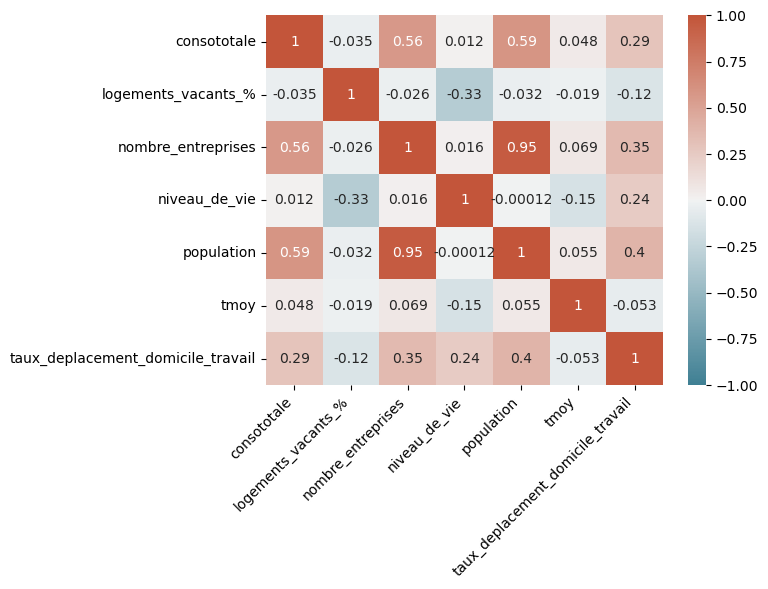

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
matrice_correlation = table_donnees[variables_modele].corr()

# Configuration de la palette de couleurs
palette = sns.diverging_palette(220, 20, as_cmap=True)

# Création de la heatmap avec Seaborn et attribution à une variable
heatmap = sns.heatmap(matrice_correlation, annot=True, cmap=palette, vmin=-1, vmax=1)

# Affichage des noms de variables en haut de la matrice
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

# Affichage de la matrice de corrélation
plt.show()


In [ ]:
# Analyse de la table de corrélation : 

# On remarque sur la première ligne de la matrice, la corrélation entre la variable explicative, et chacune des variables expliquées.
# On observe une correlation presque nulle entre la population et respectivement le taux de logements vacants, le niveau de vie et la température moyenne.
# En revanche, on observe une forte corrélation empirique entre la consommation totale et respectivement le nombre d'entreprises, la taille de la population, et le taux de déplacement domocile travail en transports en commun. Ces variables sont potentiellement importantes pour le modèle de régression.

# On peut s'attendre à ce que les variables faiblements correlées à la variable explicative ne soient pas significatives dans le modèle ?

# Enfin, on observe une très forte corrélation, presque parfaite, entre le nombre d'entreprises et la population.

In [ ]:
# Standardisation des données

In [27]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supposons que "table_donnees" est votre DataFrame initial et "variables_modele" sont les colonnes à standardiser
scaler = StandardScaler()

# Créez une copie du DataFrame initial
df_standardise = table_donnees.copy()

# Standardisez les colonnes spécifiées
df_standardise[variables_modele] = scaler.fit_transform(df_standardise[variables_modele])

# Sélectionnez les colonnes non standardisées
colonnes_non_standardisees = [col for col in df_standardise.columns if col not in variables_modele]

# Réorganisez les colonnes pour avoir les non standardisées au début suivies des standardisées
df_standardise = df_standardise[colonnes_non_standardisees + variables_modele]

df_standardise


,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy,taux_deplacement_domicile_travail
0,10003,Aix-Villemaur-Pâlis,0.133604,0.449358,0.049220,-0.701287,0.182648,-0.486664,-0.239188
1,10005,Amance,-0.240107,0.494098,-0.164504,-0.806614,-0.216060,-0.486664,-0.554750
2,10006,Arcis-sur-Aube,0.219119,1.456001,0.049220,-0.898776,0.089248,-0.486664,-0.554750
3,10007,Arconville,-0.242099,1.433631,-0.181928,0.401360,-0.233770,-0.486664,-0.554750
4,01001,L'Abergement-Clémenciat,-0.179375,-0.646765,-0.135466,0.756841,-0.148618,-0.398568,-0.361907
...,...,...,...,...,...,...,...,...,...
23279,95660,Villaines-sous-Bois,-0.190928,-1.854737,-0.112235,2.142556,-0.153955,-0.275840,3.389776
23280,95675,Villeron,-0.096921,-0.445436,-0.069258,0.740383,-0.060313,-0.275840,2.074934
23281,95676,Villers-en-Arthies,-0.189364,-0.154628,-0.145920,1.806824,-0.186949,-0.275840,0.286749
23282,95678,Villiers-Adam,-0.189512,-0.870463,-0.095973,2.715274,-0.142432,-0.275840,0.952935


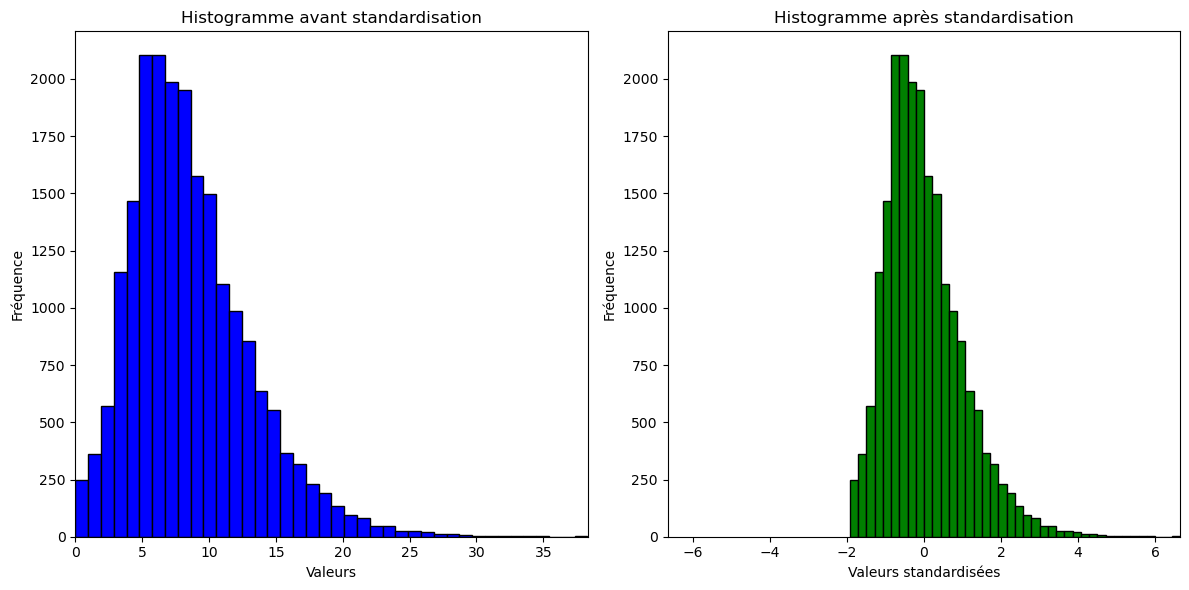

In [28]:
import numpy as np
import matplotlib.pyplot as plt


# Création de l'histogramme avant la standardisation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(table_donnees['logements_vacants_%'], bins=40, color='blue', edgecolor='black')
plt.title('Histogramme avant standardisation')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.xlim([0, table_donnees['logements_vacants_%'].max()])

# Création de l'histogramme après la standardisation
plt.subplot(1, 2, 2)
plt.hist(df_standardise['logements_vacants_%'], bins=40, color='green', edgecolor='black')
plt.title('Histogramme après standardisation')
plt.xlabel('Valeurs standardisées')
plt.ylabel('Fréquence')

plt.xlim([-df_standardise['logements_vacants_%'].max(), df_standardise['logements_vacants_%'].max()])# Affichage des deux histogrammes# Affichage des deux histogrammes
plt.tight_layout()
plt.show()


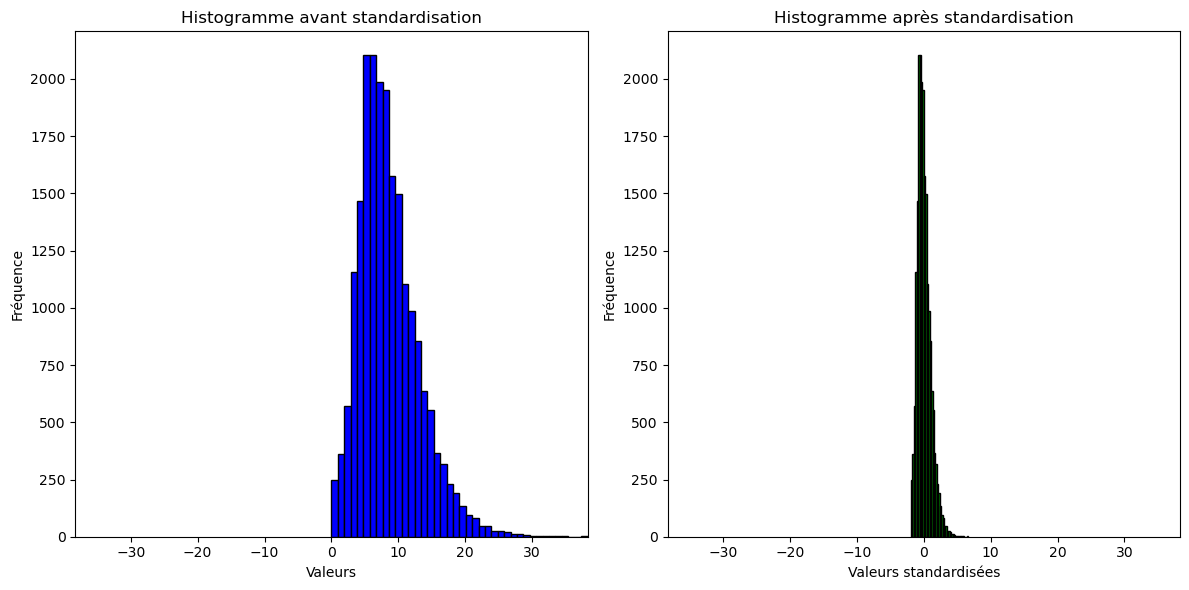

In [29]:
import numpy as np
import matplotlib.pyplot as plt


# Création de l'histogramme avant la standardisation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(table_donnees['logements_vacants_%'], bins=40, color='blue', edgecolor='black')
plt.title('Histogramme avant standardisation')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.xlim([-table_donnees['logements_vacants_%'].max(), table_donnees['logements_vacants_%'].max()])

# Création de l'histogramme après la standardisation
plt.subplot(1, 2, 2)
plt.hist(df_standardise['logements_vacants_%'], bins=40, color='green', edgecolor='black')
plt.title('Histogramme après standardisation')
plt.xlabel('Valeurs standardisées')
plt.ylabel('Fréquence')

plt.xlim([-table_donnees['logements_vacants_%'].max(), table_donnees['logements_vacants_%'].max()])

# Affichage des deux histogrammes
plt.tight_layout()
plt.show()

In [ ]:
# Création d'une base test et d'une base d'entraînement

In [30]:
from sklearn.model_selection import train_test_split

# Séparation en variables indépendantes (X) et variable dépendante (y)
X = df_standardise.drop(['code_commune','libelle_commune','consototale'], axis=1)
y = df_standardise['consototale']

# Division des données en ensemble d'entraînement (train set) et ensemble de test (test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# "test_size" détermine la proportion d'observations à inclure dans l'ensemble de test (ici, 20%)
# "random_state" est utilisé pour garantir la reproductibilité des résultats, on peut choisir n'importe quel nombre

# Affichage des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test (X_test, y_test):", X_test.shape, y_test.shape)


Dimensions de l'ensemble d'entraînement (X_train, y_train): (16636, 6) (16636,)
Dimensions de l'ensemble de test (X_test, y_test): (4160, 6) (4160,)


In [ ]:
# Régression Linéaire :

In [42]:
# Ajouter une constante à la matrice des caractéristiques (X) pour le terme d'interception
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Création d'un modèle de régression linéaire avec statsmodels
modele_regression = sm.OLS(y_train, X_train).fit()


In [ ]:
# Interprétation / significativité des coefficients

In [41]:
modele_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consototale   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     2209.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:19:02   Log-Likelihood:                -17058.
No. Observations:               16636   AIC:                         3.413e+04
Df Residuals:                   16629   BIC:                         3.418e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0048      0.005     -0.909      0.363      -0.015       0.005
logements_vacants_%                  -0.0084      0.006     -1.502      0.133      -0.019       0.003
nombre_entreprises                    0.0199      0.017      1.181      0.237      -0.013       0.053
niveau_de_vie                        -0.0090      0.006     -1.549      0.121      -0.020       0.002
population                            0.5185      0.018     29.460      0.000       0.484       0.553
tmoy                                  0.0148      0.005      2.781      0.005       0.004       0.025
taux_deplacement_domicile_travail     0.0800      0.006     13.476      0.000       0.068       0.092
==============================================================================
Omnibus:                    21758.198   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        170289236.000
Skew:                           6.046   Prob(JB):                         0.00
Kurtosis:                     498.502   Cond. No.                         7.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Interprétation des coefficients : 

## Logements_vacants_% :
# Le coefficient de cette variable est : -0.0084. Ce coefficient est faible, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique peu la consommation d'énergie
# Son signe est négatif , il semblerait donc qu'augmenter le taux de logements vacants dans une commune fasse diminuer la consommation totale d'énergie.
# Sa p-value étant de 0.133 , il semblerait que cette variable ne soit pas significative, même au seuil de 10%.

## nombre_entreprises :
# Le coefficient de cette variable est : 0.0199 Ce coefficient est faible, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique peu la consommation d'énergie
# Son signe est positif , il semblerait donc qu'augmenter le nombre d'entreprises dans une commune fasse augmenter la consommation totale d'énergie.
# Sa p-value étant de 0.237 , il semblerait que cette variable ne soit pas significative, même au seuil de 10%

## niveau_de_vie :
# Le coefficient de cette variable est : -0.0090. Ce coefficient est faible, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique peu la consommation d'énergie
# Son signe est negatif , il semblerait donc qu'augmenter le niveau de vie dans une commune fasse diminuer la consommation totale d'énergie.
# Sa p-value étant de 0.121 , il semblerait que cette variable ne soit pas significative, même au seuil de 10%

## population :
# Le coefficient de cette variable est : 0.5185. Ce coefficient est élevé, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique beaucoup la consommation d'énergie
# Son signe est positif , il semblerait donc qu'augmenter la population dans une commune fasse augmenter la consommation totale d'énergie.
# Sa p-value étant de 0.000 , il semblerait que cette variable soit significative, même au seuil de 1%

## tmoy :
# Le coefficient de cette variable est : 0.0148. Ce coefficient est faible, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique peu la consommation d'énergie
# Son signe est positif , il semblerait donc qu'augmenter la température moyenne dans un département fasse augmenter la consommation totale d'énergie des communes.
# Sa p-value étant de 0.005 , il semblerait que cette variable soit significative, même au seuil de 1%

## taux_deplacement_domicile_travail :
# Le coefficient de cette variable est : 0.0800. Ce coefficient est faible, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique peu la consommation d'énergie
# Son signe est poisitif , il semblerait donc qu'augmenter le taux de déplacements domicile-travail en transports en commun dans une commune fasse augmenter la consommation totale d'énergie
# Sa p-value étant de 0.000 , il semblerait que cette variable soit significative, même au seuil de 1%


# Pour conclure sur l'analyse des coefficients de ce modèle, on observe des signes de coefficients qui vont à l'encontre de nos hypothèses : 
# Nous avions supposé que les relations entre le taux de logements vacants, ainsi que le niveau de vie, avec la consommation d'energie était positives. La régression semble nous indiquer le contraire.
# Parallèlement, Nous avions supposé une relation négative entre la température moyenne et la consommation d'energie. Encore une fois, la régression semble nous indiquer le contraire.

In [ ]:
# Maintenant qu'on a interprété les coefficients, on revient à des données non standardisées :

In [89]:
from sklearn.model_selection import train_test_split

# Séparation en variables indépendantes (X) et variable dépendante (y)
X = table_donnees.drop(['code_commune','libelle_commune','consototale'], axis=1)
y = table_donnees['consototale']

# Division des données en ensemble d'entraînement (train set) et ensemble de test (test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# "test_size" détermine la proportion d'observations à inclure dans l'ensemble de test (ici, 20%)
# "random_state" est utilisé pour garantir la reproductibilité des résultats, on peut choisir n'importe quel nombre

# Affichage des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test (X_test, y_test):", X_test.shape, y_test.shape)

# Ajouter une constante à la matrice des caractéristiques (X) pour le terme d'interception
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Création d'un modèle de régression linéaire avec statsmodels
modele_regression = sm.OLS(y_train, X_train).fit()

modele_regression.summary()


Dimensions de l'ensemble d'entraînement (X_train, y_train): (16636, 6) (16636,)
Dimensions de l'ensemble de test (X_test, y_test): (4160, 6) (4160,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consototale   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     2209.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:03:25   Log-Likelihood:            -1.9442e+05
No. Observations:               16636   AIC:                         3.888e+05
Df Residuals:                   16629   BIC:                         3.889e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1370.0994   3093.210      0.443      0.658   -4692.922    7433.121
logements_vacants_%                 -80.1718     53.363     -1.502      0.133    -184.769      24.425
nombre_entreprises                    0.9871      0.835      1.181      0.237      -0.651       2.625
niveau_de_vie                        -0.1260      0.081     -1.549      0.121      -0.286       0.033
population                            2.6835      0.091     29.460      0.000       2.505       2.862
tmoy                                459.1821    165.087      2.781      0.005     135.594     782.770
taux_deplacement_domicile_travail   598.6132     44.421     13.476      0.000     511.544     685.682
==============================================================================
Omnibus:                    21758.198   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        170289236.000
Skew:                           6.046   Prob(JB):                         0.00
Kurtosis:                     498.502   Cond. No.                     3.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Evaluation du modèle

In [90]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

# Prédictions sur l'ensemble de test
predictions = modele_regression.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2548462016.378911
R-squared (R2): 0.1898876023037872


In [ ]:
# On observe un R2 relativement faible => qualité prédictive de notre modèle est mauvaise mais on peut chercher à l'améliorer

In [ ]:
# Visualisation

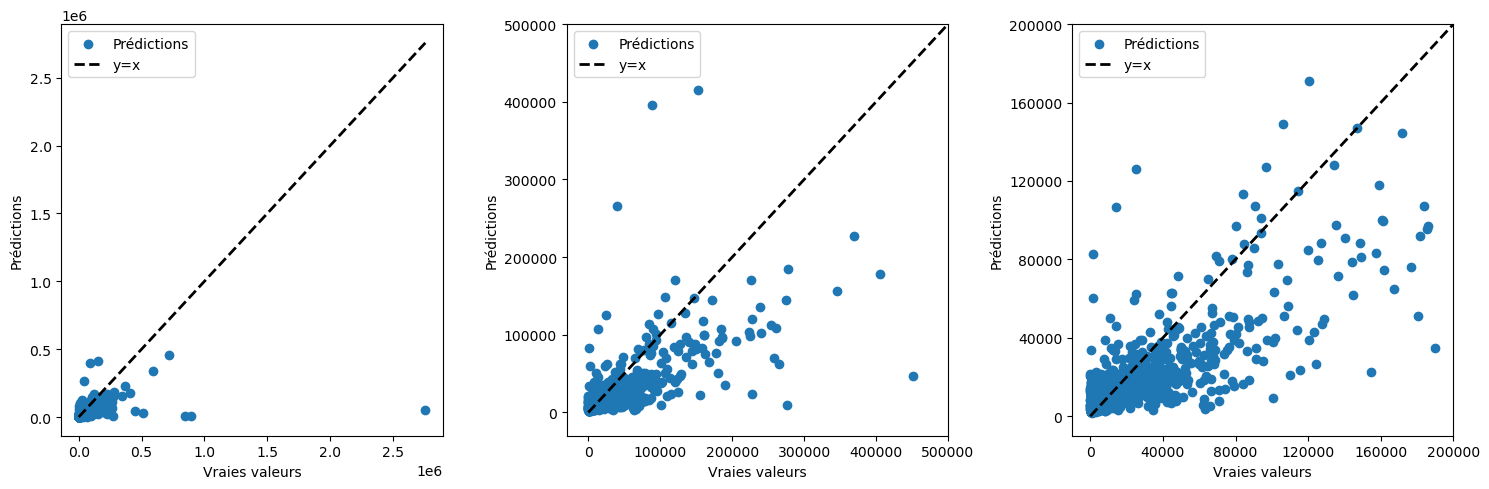

In [91]:
# Création d'une disposition de sous-tracés 1x3
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(y_test, predictions, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='y=x', linewidth=2)
plt.xlabel("Vraies valeurs")
plt.ylabel("Prédictions")
plt.legend()

plt.subplot(132)
plt.scatter(y_test, predictions, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='y=x', linewidth=2)
plt.xlabel("Vraies valeurs")
plt.ylabel("Prédictions")
plt.xlim(-30000, 500000)
plt.ylim(-30000, 500000)
plt.legend()

plt.subplot(133)
plt.scatter(y_test, predictions, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='y=x', linewidth=2)
plt.xlabel("Vraies valeurs")
plt.ylabel("Prédictions")
plt.xlim(-10000, 200000)
plt.ylim(-10000, 200000)
plt.legend()

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))


# Affichage des sous-tracés
plt.tight_layout()
plt.show()

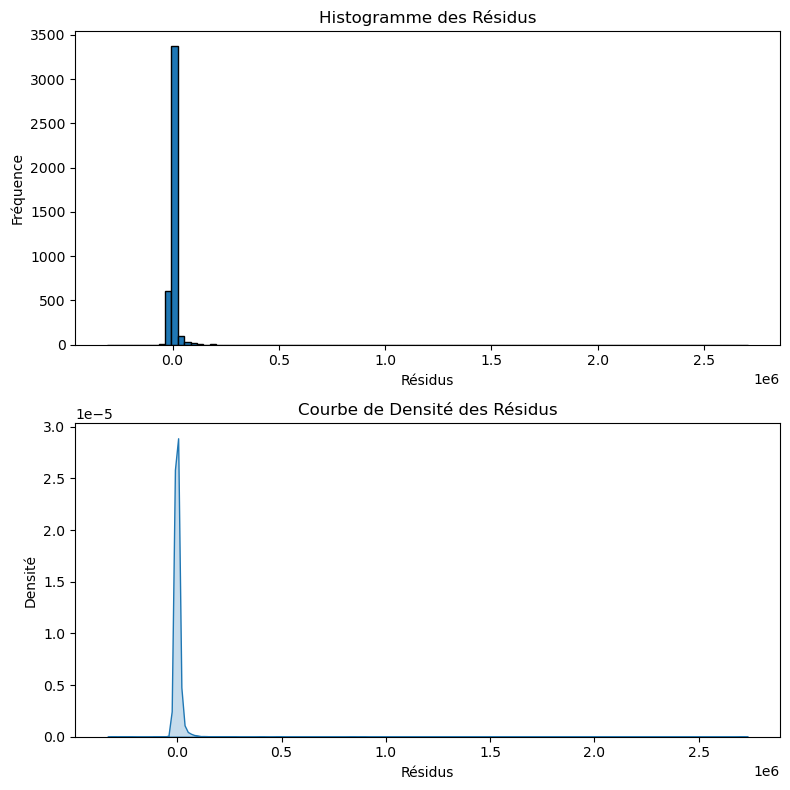

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions sur la base de test standardisée
predictions_test = modele_regression.predict(X_test)

# Calcul des résidus
residus = y_test - predictions_test

# Création d'une figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogramme des résidus
axes[0].hist(residus, bins=100, edgecolor='black')
axes[0].set_title('Histogramme des Résidus')
axes[0].set_xlabel('Résidus')
axes[0].set_ylabel('Fréquence')

# Courbe de densité des résidus
sns.kdeplot(residus, fill=True, ax=axes[1])
axes[1].set_title('Courbe de Densité des Résidus')
axes[1].set_xlabel('Résidus')
axes[1].set_ylabel('Densité')

# Ajustement de l'espace entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()


In [97]:
import numpy as np

# Calcul des résidus
residus = y_test - predictions

# Statistiques descriptives sur les résidus
mean_residus = np.mean(residus)
median_residus = np.median(residus)
std_dev_residus = np.std(residus)
min_residus = np.min(residus)
max_residus = np.max(residus)

# Affichage des statistiques descriptives
print(f"Moyenne des résidus : {mean_residus}")
print(f"Médiane des résidus : {median_residus}")
print(f"Écart-type des résidus : {std_dev_residus}")
print(f"Minimum des résidus : {min_residus}")
print(f"Maximum des résidus : {max_residus}")

Moyenne des résidus : 1014.7560492504464
Médiane des résidus : -2977.6949325304154
Écart-type des résidus : 50472.09413665556
Minimum des résidus : -307011.4170605679
Maximum des résidus : 2707536.285963692


In [ ]:
# La visualisation de la prédiction nous laisse de fortes raisons de croire que certaines hypothèse de régression linéaire ne sont pas validé. On le vérifie par des tests 

In [100]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import shapiro, bartlett, anderson
from statsmodels.stats.stattools import durbin_watson

# Supposons que vous ayez déjà ajusté votre modèle de régression et obtenu les résidus (residus)
# modele_regression = sm.OLS(y, X).fit()
# residus = modele_regression.resid

# Test de normalité (Shapiro-Wilk)
stat_shapiro, p_shapiro = shapiro(residus)
print(f"Test de normalité (Shapiro-Wilk): Statistique={stat_shapiro}, p-value={p_shapiro}")

# Test d'indépendance (Durbin-Watson)
stat_dw = durbin_watson(residus)
print(f"Test d'indépendance (Durbin-Watson): Statistique={stat_dw}")

# Test d'homoscédasticité (Bartlett)
# Note : Le test de Bartlett teste l'homoscédasticité en supposant que les échantillons suivent une distribution normale.
# Si vos résidus ne suivent pas une distribution normale, utilisez le test de Levene.
stat_bartlett, p_bartlett = bartlett(residus, np.arange(len(residus)))
print(f"Test d'homoscédasticité (Bartlett): Statistique={stat_bartlett}, p-value={p_bartlett}")



Test de normalité (Shapiro-Wilk): Statistique=0.09168809652328491, p-value=0.0
Test d'indépendance (Durbin-Watson): Statistique=2.007316086057421
Test d'homoscédasticité (Bartlett): Statistique=25331.73302678883, p-value=0.0


In [ ]:
#Test de normalité (Shapiro-Wilk) : la p-value étant de 0.0, on rejette l'hypothèse nulle. Ainsi, les résidus ne suivent pas une distribution normale.

#Test d'indépendance (Durbin-Watson) : La statistique de Durbin - Watson est très proche de 2, on suppose une très faible autocorrélation des résidus

#Test d'homoscédasticité (Bartlett ou Levene) : la p-value étant de 0.0, on rejette l'hypothèse nulle. Ainsi, les résidus sont hétéroscédastiques.

In [ ]:
# Interpréter les statistiques descriptives des résidus peut fournir des informations importantes sur la qualité de votre modèle de régression. Voici comment interpréter certaines de ces informations :

    #Moyenne des résidus :
        #Si la moyenne des résidus est proche de zéro, cela suggère que le modèle ne présente pas de biais systématique. Cependant, il est toujours important d'examiner d'autres aspects.

    #Médiane des résidus :
        #La médiane peut être moins sensible aux valeurs aberrantes que la moyenne. Une médiane proche de zéro indique également une absence de biais systématique.

    #Écart-type des résidus :
        #L'écart-type des résidus mesure la dispersion des résidus autour de la moyenne. Une valeur faible suggère que les résidus sont généralement proches de la moyenne, ce qui est souhaitable. Une valeur élevée peut indiquer une grande variabilité des erreurs de prédiction.

    #Minimum et maximum des résidus :
        #Examiner le minimum et le maximum des résidus peut vous aider à identifier les valeurs aberrantes ou les observations qui ont une influence disproportionnée sur votre modèle. Si vous avez des valeurs extrêmement élevées ou basses, cela pourrait indiquer des problèmes.

#En résumé, des résidus centrés autour de zéro avec une dispersion modérée, et sans valeurs aberrantes évidentes, indiquent généralement un bon ajustement du modèle. Cependant, n'oubliez pas que l'interprétation dépend du contexte spécifique de votre analyse et des exigences de votre problème.

In [ ]:
# Représenter grâce à un graphique la matrice de corrélation. Vous pouvez utiliser le package seaborn et sa fonction heatmap.
#
# Standardiser les variables, regarder histogramme avant/après standardisation
#
# Gérer les données manquantes
#
# Gérer les données abérantes : on regarde (visuellement ?) la distribution de la variable, puis on décide de supprimer ou non une partie des données (0.1%, 1% etc...)
# Constituer un échantillon d'entraînement, et un échatillon test
#
# Effectuer la régression linéaire, interprétter les coefficients
#
# Appliquer le modèle sur la base test, étudier le R2, voir AIC, BIC...?
#
# Se poser le problème du surapprentissage : passer à une régression avec critère de pénalisation : sélection de variables
# On utilise la cross-validation pour trouver le paramètre optimal de pénalisation
#
# Comparaison des résultats avec le modèle sans critère de pénalisation
#
#
#
#
#

In [ ]:
# Modèles possibles : 
#
# => Régression Linéaire Multiple
#
# => Random Forest
#
# => XG Boost
#
# => Pénalisation ridge et lasso
#
# => Clustering
#
#
#
#


## Entraînement et Test

# 7. Évaluation des Résultats

## Interprétation des Modèles

## Mesures de Performance 

# 8. Synthèse et Recommandations

## Conclusions Clés 

## Recommandations